# <b>AASD 4011 - Mathematical Concepts for Deep Learning Group Project</b>

### <b>Member:</b> 1. Sik Yin Sun (101409665)  2. Chun Cheong Mak (101409987)

<font size=3>In this project, IMDB dataset of 50K movie reviews from Kaggle is analyzed in this notebook. Instead of using pre-existing solutions, we plan to construct our own model from scratch. <br>
<br>
In this notebook, we aim to assess the impact of <font color=red><b>kernel initializers</b></font> and <font color=red><b>optimizers</b></font> on the performance of a neural network model. To conduct this experiment, all the hyperparameters, such as the number of neurons, layers, activation functions, and others, will remain constant. The variables we will manipulate are the <font color=red><b>kernel initializers</b></font> and <font color=red><b>optimizers</b></font>. The metric to evaluate the performance of the model is <font color=red><b>“accuracy”</b></font>.

In the initial stage of this project, we aim to perform data exploration to identify any missing or exceptional values in the dataset. Afterward, we will transform the categorical labels into numerical representations.<br>
<br>
Subsequently, our objective is to construct a baseline model, and fine-tune it to improve accuracy through changes in the number of layers, neurons, and other parameters except for the <font color=red><b>kernel initializers</b></font> and <font color=red><b>optimizers</b></font>. The <font color=red><b>default kernel initializer (glorot_uniform)</b></font> and <font color=red><b>adam optimizer</b></font> will be used in the baseline model.<br>
<br>
Finally, we will conduct an experiment to assess the impact of <font color=red><b>different combinations of kernel initializers and optimizers</b></font> on the baseline model's accuracy by using them as the only varying factors while all other hyperparameters remain unchanged.<br> 
<br>
The combinations of the following 2 hyperparameters will be examined.<br></font>

<font size=3>Kernel Initializer: 
- Glorot Uniform Initialization
- Glorot Normal Initialization
- He Uniform Initialization
- He Normal Initialization
- LeCun Normal Initialization
- Self-defined Initialization (details will be discussed)</font>

<font size=3>Optimizer:
- Adam
- RMSProp
- SGD</font>

<font size=3>The main takeaways from this notebook:
- Explore, preprocess and encode the dataset 
- Build a baseline model
- Examine combinations of above kernel initializers and optimizers (totally 18 combinations) by the baseline model
- Evaluate the train accuracy, validation accuracy, test accuracy of all combinations
- Evaluate the train loss, validation loss, test loss of all combinations</font>

### <b>Data - IMDB Dataset of 50K Movie Reviews</b>
<font size=3>The link of Kaggle:</font>
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


### <b>Table of Contents:</b><br>
<font size=3>
&nbsp;&nbsp;&nbsp;&nbsp;1. Data Exploration<br>
&nbsp;&nbsp;&nbsp;&nbsp;2. Data Pre-processing<br>
&nbsp;&nbsp;&nbsp;&nbsp;3. Exploratory Data Analysis<br>
&nbsp;&nbsp;&nbsp;&nbsp;4. Split the Data to Train, Validation and Test<br>
&nbsp;&nbsp;&nbsp;&nbsp;5. Data Encoding<br>
&nbsp;&nbsp;&nbsp;&nbsp;6. Baseline Model<br>
&nbsp;&nbsp;&nbsp;&nbsp;7. Adam Optimizer & 6 Kernel Initializers<br>
&nbsp;&nbsp;&nbsp;&nbsp;8. Evaluation of Adam Optimizer & 6 Kernel Initializers<br>
&nbsp;&nbsp;&nbsp;&nbsp;9. RMSProp Optimizer & 6 Kernel Initializers<br>
&nbsp;&nbsp;&nbsp;&nbsp;10. Evaluation of RMSProp Optimizer & 6 Kernel Initializers<br>
&nbsp;&nbsp;&nbsp;&nbsp;11. SGD Optimizer & 6 Kernel Initializers<br>
&nbsp;&nbsp;&nbsp;&nbsp;12. Evaluation of SGD Optimizer & 6 Kernel Initializers<br>
&nbsp;&nbsp;&nbsp;&nbsp;13. Conclusion</font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, LSTM, Bidirectional

### <b>1. Data Exploration</b>

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

<font size=3>After a brief exploration of the data, there is no null value in either the review or sentiment columns. Additionally, it is necessary to convert the sentiment column data type from a string to an integer.</font>

In [6]:
df['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

<font size=3>In the above review, there are some html tags and extraneous symbols. In order to guarantee the accuracy and relevance of our analysis, it is necessary to remove these elements from the data.</font>

In [7]:
df['sentiment'] = df['sentiment'].apply(lambda x: 0 if x == 'negative' else 1) 

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [9]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

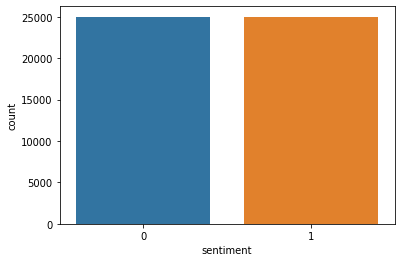

In [10]:
%matplotlib inline
sns.countplot(x='sentiment', data=df)

<font size=3>The ratio of postive and negative sentiments is 50:50.</font>

### <b>2. Data Pre-processing</b>

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<font size=3>The function below performs a series of operations on a string for the input of various models:
- Convert the string to lowercase 
- Remove symbols and URLs
- Strip newline characters and punctuation</font>

In [12]:
stop_words = stopwords.words('english') #English language's stop words

def textpreprocess(s):
    words = [] # empty list
    
    s = s.strip().lower() # lower the string
    s = re.sub('\[.*?\]', '', s) # removes symbols (.*?\)
    s = re.sub('https?://\S+|www\.\S+', '', s) # remove URLS
    s = re.sub('<.*?>+', '', s)
    s = re.sub('[%s]' % re.escape(string.punctuation), '', s) # remove punctuations
    s = re.sub('\n', '', s) # remove next line character
    s = re.sub('\w*\d\w*', '', s)
    
    words = s.split() # split the string into list of words
    words = [word for word in words if word not in stop_words] # removing stop words
    s = ' '.join(words) # converting list to string
    
    return s

<font size=3>The result, which is stored in a new column, is a clean and well-formatted string that can be effectively used in our models.</font>

In [13]:
df['clean'] = df['review'].apply(textpreprocess)

In [14]:
df.head()

,review,sentiment,clean
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...


### <b>3. Exploratory Data Analysis</b>

#### 3.1 Word Cloud for Postive Sentiment

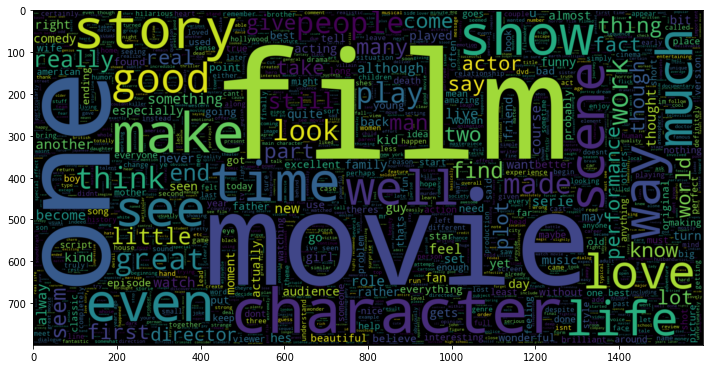

In [15]:
plt.figure(figsize = (12,12)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 1].clean))
plt.imshow(wc , interpolation = 'bilinear')
plt.show()

#### 3.2 Word Cloud for Negative Sentiment

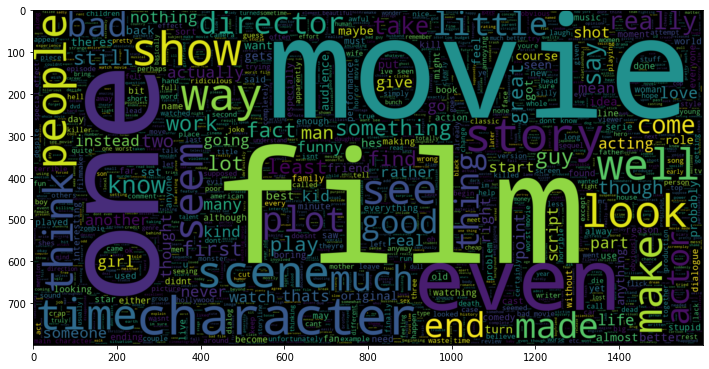

In [16]:
plt.figure(figsize = (12,12)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].clean))
plt.imshow(wc , interpolation = 'bilinear')
plt.show()

<font size=3>From the above two word clouds, it is shown that the words associated with positive and negative sentiments are highly similar. For instance, "movie", "file", "one" occur frequently in both cases. Hence, it is <font color=red><b>NOT</b></font> sufficient to simply consider individual words, but consider the context. Therefore, <font color=red><b>bidirectional layers</b></font> are used in the models for capturing the contextual information in the data.</font>

In [17]:
X = df.clean.values.tolist()

In [18]:
y = np.array(df.sentiment.values.tolist())

In [19]:
X[0]

'one reviewers mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle cl

In [20]:
y[0]

1

### <b>4. Split the Data to Train, Validation and Test</b>

<font size=3>The ratio of train set, validation set and test set is 80:10:10.</font>

In [21]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

### <b>5. Data Encoding</b>

#### 5.1 Integer Encoding with Tokenizer

<font size=3>The code below creates a tokenizer, which is an object, to map the words in the text to unique numerical values:
- `num_words`: the maximum number of words to keep, based on word frequency. Only the most common `num_words`-1 words will be kept.
- `oov_token`: if given, it will be added to `word_index` and used to replace out-of-vocabulary words during `text_to_sequence` calls
</font>

<font size=3>The code fits the tokenizer on train set by `fit_on_texts` method and transforms the train, validation and test sets into numerical sequences by `texts_to_sequences` method</font>

In [23]:
num_words_ = 5000
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=num_words_, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

#### 5.2 Create Equal Length Inputs with Pad Sequences

<font size=3>The code below pads sequences of the train, validation and test sets to the same length:
- `maxlen`: maximum length of all sequences
- `padding`: pad either before (`'pre'`) or after (`'post'`) each sequence
- `truncating`: remove values from sequences larger than maxlen, either at the beginning (`'pre'`) or at the end (`'post'`) of the sequences.
</font>

<font size=3>The purpose of padding is to ensure that all the sequences have the same length. In this case, the maximum length is set to be 500. The code pads after each sequence and removes values from sequences larger than 500 at the end of the sequences.</font>

In [24]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 500
trunc_type='post'
padding_type='post'

X_train = pad_sequences(X_train, maxlen=maxlen, truncating= trunc_type, padding=padding_type)
X_valid = pad_sequences(X_valid, maxlen=maxlen, truncating= trunc_type, padding=padding_type)
X_test = pad_sequences(X_test, maxlen=maxlen, truncating= trunc_type, padding=padding_type)

#### 5.3 GloVe Word Embedding 

<font size=3>Pre-trained GloVe word embedding with 50 dimensions is used to do word embedding.</font>

<font size=3>The source from Kaggle:</font>
https://www.kaggle.com/datasets/watts2/glove6b50dtxt

In [25]:
embeddings_dictionary = dict()
glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

#### 5.4 Create the Embedding Matrix

<font size=3> The cell below creats an embedding matrix from the pre-trained GloVe word embeddings with 50 dimensions for the embedding layer in the models.

In [26]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

### <b>6. Baseline Model</b>

<font size=3>In the baseline model, the first layer is an embedding layer that converted the words in text to word embedding vectors with 50 dimensions.<br><br>
The second and third layers are bidirectional LSTM layers with 128 and 32 units respectively because words on both sides should be considered to capture the contextual information in the data. LSTM is used to avoid the vanishing gradient problem and hyperbolic tangent activation functions are used in these two layers.<br><br>
The fourth and last layers are dense layers with 16 and 1 units respectively and sigmoid activation functions are used in these two layers. As the model is a binary classifier, sigmoid activation function should be used in the last layer.<br><br>
As the kernel initializers are not stated in below code, the <b><font color=red>default kernel initializers (Glorot uniform initialization)</font></b> are used.
</font>

In [27]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True)))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

<font size=3>As the model is a binary classifier, binary cross entropy loss function is used. Adam optimizer is used to minimize the loss function with batch size 128 in 10 epochs and accuracy is the metric to evaluate the performance.</font>

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 50)           9309450   
                                                                 
 bidirectional (Bidirectiona  (None, 500, 256)         183296    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9,567,787
Trainable params: 258,337
Non-tr

In [29]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
313/313 [==============================] - 47s 117ms/step - loss: 0.5957 - accuracy: 0.6886 - val_loss: 0.5411 - val_accuracy: 0.7560
Epoch 2/10
313/313 [==============================] - 37s 117ms/step - loss: 0.4882 - accuracy: 0.7733 - val_loss: 0.4652 - val_accuracy: 0.7800
Epoch 3/10
313/313 [==============================] - 44s 140ms/step - loss: 0.4335 - accuracy: 0.8051 - val_loss: 0.4087 - val_accuracy: 0.8168
Epoch 4/10
313/313 [==============================] - 43s 137ms/step - loss: 0.3941 - accuracy: 0.8295 - val_loss: 0.3922 - val_accuracy: 0.8264
Epoch 5/10
313/313 [==============================] - 36s 115ms/step - loss: 0.3716 - accuracy: 0.8389 - val_loss: 0.3611 - val_accuracy: 0.8436
Epoch 6/10
313/313 [==============================] - 39s 123ms/step - loss: 0.3433 - accuracy: 0.8530 - val_loss: 0.3424 - val_accuracy: 0.8554
Epoch 7/10
313/313 [==============================] - 36s 115ms/step - loss: 0.3233 - accuracy: 0.8640 - val_loss: 0.3300 - val_ac

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

157/157 [==============================] - 6s 37ms/step - loss: 0.3272 - accuracy: 0.8596


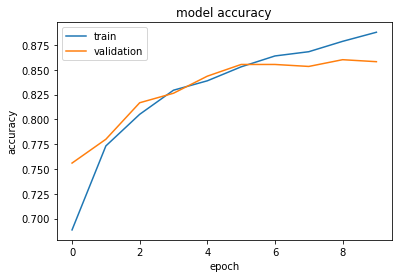

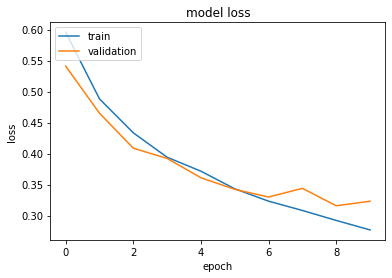

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

<font size=3>Based on the architecture of the above baseline model, we create functions for creating and evaluating models with different kernel initalizers and optimizers. we will assess the impact of <b><font color=red>18 combinations of kernel initializers and optimizers</font></b> on the baseline model's accuracy by using them as the <b><font color=red>only varying factors while all other hyperparameters remain unchanged</font></b>.</font>

In [32]:
def build_model(op, kl):
    temp_model = Sequential()
    embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
    temp_model.add(embedding_layer)
    temp_model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True, kernel_initializer=kl)))
    temp_model.add(Bidirectional(LSTM(32, activation='tanh', kernel_initializer=kl)))
    temp_model.add(Dense(16, activation='sigmoid', kernel_initializer=kl))
    temp_model.add(Dense(1, activation='sigmoid', kernel_initializer=kl))
    temp_model.compile(optimizer=op, loss="binary_crossentropy",  metrics=["accuracy"])
    return temp_model

In [33]:
# def build_and_train_model(op, kl):
#     model = build_model(kl)
#     model.compile(optimizer= op, loss="binary_crossentropy",  metrics=["accuracy"])
#     history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid)) 
#     return [model, history]

In [34]:
def plot_graph(hi):
    plt.plot(hi.history['accuracy'])
    plt.plot(hi.history['val_accuracy'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

    plt.plot(hi.history['loss'])
    plt.plot(hi.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

### <b>7. Adam Optimizer & 6 Kernel Initializers</b>

<font size=3>6 combinations of <b><font color=red>Adam</font></b> optimizer and <b><font color=red>Glorot uniform</font></b> , <b><font color=red>Glorot normal</font></b> , <b><font color=red>He uniform</font></b> , <b><font color=red>He normal</font></b> , <b><font color=red>LeCun normal</font></b>  and a <b><font color=red>self-defined (details will be discussed)</font></b> initialization are investigated as follows:</font>

#### 7.1 Glorot Uniform Initialization 

<font size=3>In this case, the result from the above baseline model can be used directly.</font>

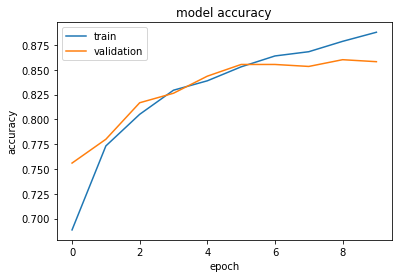

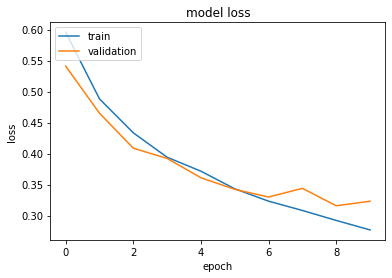

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

#### 7.2 Glorot Normal Initialization

157/157 [==============================] - 7s 44ms/step - loss: 0.3161 - accuracy: 0.8662


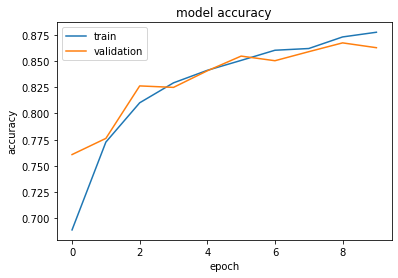

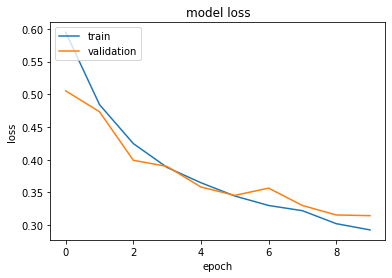

In [36]:
adam_glorot_nor = build_model('adam', 'glorot_normal')
adam_glorot_nor_history = adam_glorot_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
adam_glorot_nor_loss, adam_glorot_nor_accuracy = adam_glorot_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(adam_glorot_nor_history)

#### 7.3 He Uniform Initialization

157/157 [==============================] - 6s 40ms/step - loss: 0.3282 - accuracy: 0.8646


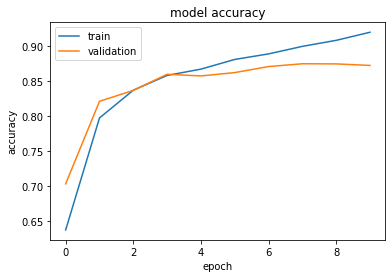

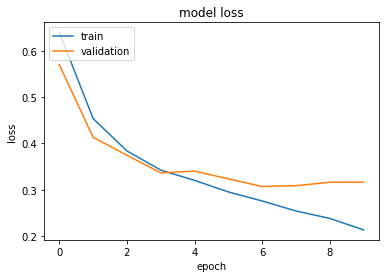

In [37]:
adam_he_uni = build_model('adam', 'he_uniform')
adam_he_uni_history = adam_he_uni.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
adam_he_uni_loss, adam_he_uni_accuracy = adam_he_uni.evaluate(X_test, y_test, verbose=1)
plot_graph(adam_he_uni_history)

#### 7.4 He Normal Initialization 

157/157 [==============================] - 7s 46ms/step - loss: 0.3655 - accuracy: 0.8598


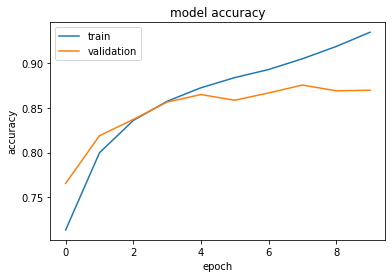

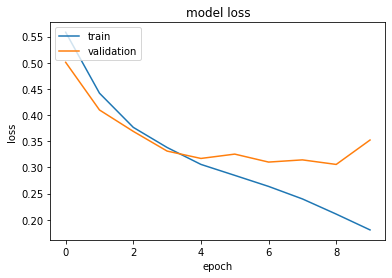

In [38]:
adam_he_nor = build_model('adam', 'he_normal')
adam_he_nor_history = adam_he_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
adam_he_nor_loss, adam_he_nor_accuracy = adam_he_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(adam_he_nor_history)

#### 7.5 LeCun Normal Initialization 

157/157 [==============================] - 7s 42ms/step - loss: 0.3167 - accuracy: 0.8662


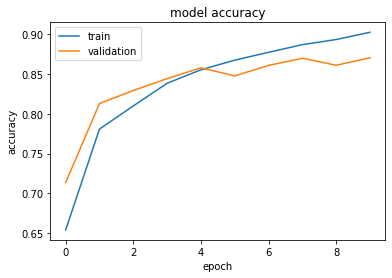

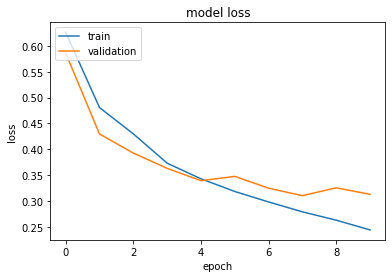

In [39]:
adam_lecun_nor = build_model('adam', 'lecun_normal')
adam_lecun_nor_history = adam_lecun_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
adam_lecun_nor_loss, adam_lecun_nor_accuracy = adam_lecun_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(adam_lecun_nor_history)

#### 7.6 Self-defined Initialization

<font size=3>This is a He Initialization with a uniform distribution based on $fan_{avg}$</font>

In [40]:
from keras.initializers import VarianceScaling
he_avg_init = VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')

157/157 [==============================] - 7s 44ms/step - loss: 0.3331 - accuracy: 0.8622


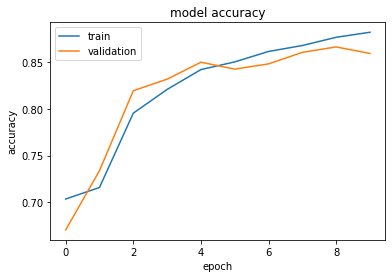

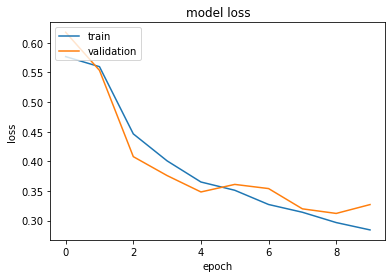

In [41]:
adam_self_define = build_model('adam', he_avg_init)
adam_self_define_history = adam_self_define.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
adam_self_define_loss, adam_self_define_accuracy = adam_self_define.evaluate(X_test, y_test, verbose=1)
plot_graph(adam_self_define_history)

### <b>8. Evaluation of Adam Optimizer & 6 Kernel Initializers</b>

#### 8.1 Training Accuracy & Validation Accuracy

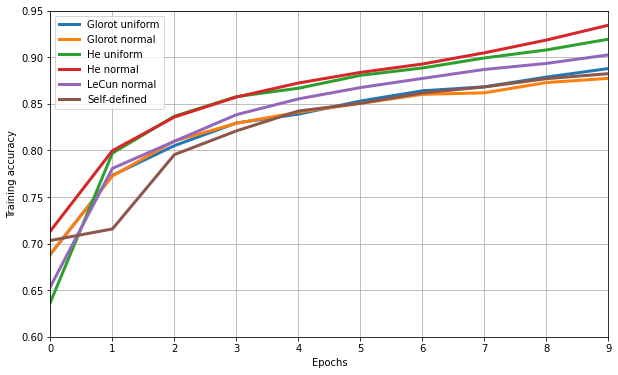

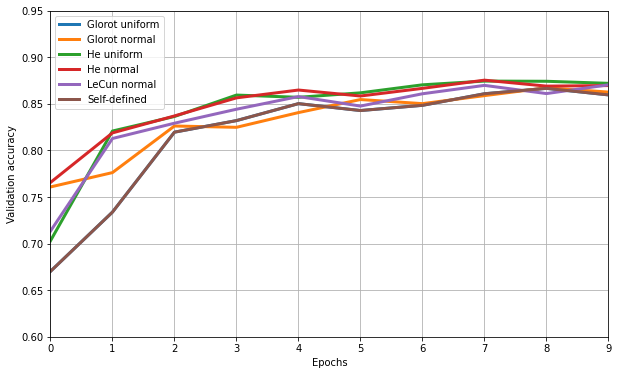

In [42]:
for accuracy in ("accuracy", "val_accuracy"):
    plt.figure(figsize=(10, 6))
    initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal', 'Self-defined']
    for history, initializer in zip((history, adam_glorot_nor_history, adam_he_uni_history, 
                                  adam_he_nor_history, adam_lecun_nor_history, adam_self_define_history),
                                 initializer):
        plt.plot(history.history[accuracy], label=f"{initializer}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"accuracy": "Training accuracy", "val_accuracy": "Validation accuracy"}[accuracy])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.6, 0.95])
    plt.show()

<font size=3>According to the training accuracy vs epochs graph, it seems that He normal initializer outperforms others with highest accuracy (>0.93). However, the validation accuracy vs epochs graph shows that the performance of each initializer is very close and converage to around 0.86. <br><br>
There should be a problem of overfitting for He normal initializer. The graphs in section 7.4 also prove overfitting that results in unsatisfactory performance with new data.
</font>

#### 8.2 Training Loss & Validation Loss

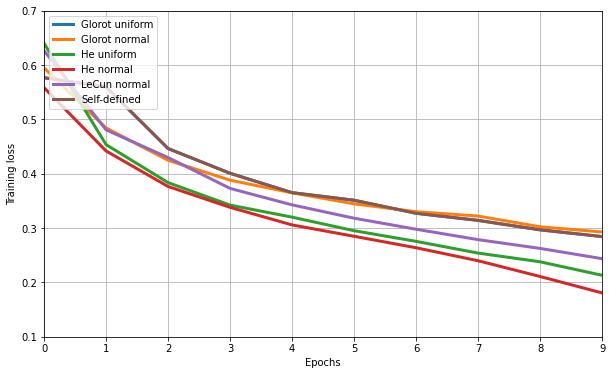

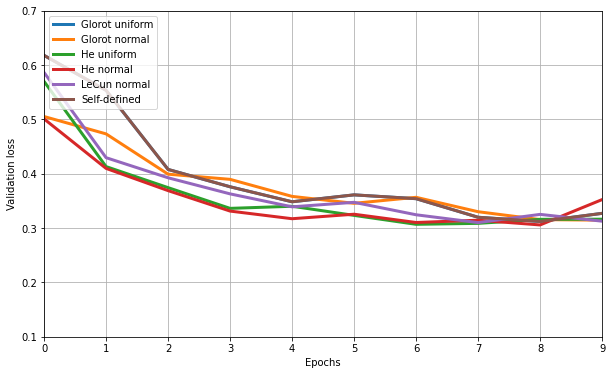

In [43]:
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(10, 6))
    initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal', 'Self-defined']
    for history, initializer in zip((history, adam_glorot_nor_history, adam_he_uni_history, 
                                  adam_he_nor_history, adam_lecun_nor_history, adam_self_define_history),
                                 initializer):
        plt.plot(history.history[loss], label=f"{initializer}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

<font size=3>In the graph of validation loss vs epochs, the loss of all initializers, except He normal initializer, coverage to around 0.32, while the loss of He normal initializer is around 0.35. <br><br>
In the graph of training loss vs epoch, the loss of He normal, He uniform and LeCun normal is below 0.3 after 6 epochs. The models with He normal, He uniform and LeCun normal initializers suffer from overfitting and the problem for He normal initializers should be the most serious.</font>

#### 8.3 Test Accuracy & Test Loss for Adam Optimizer & 6 Kernerl Initializers

In [44]:
initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal', 'Self-defined']
adam_test_accuracy = [test_accuracy, adam_glorot_nor_accuracy, adam_he_uni_accuracy, 
                      adam_he_nor_accuracy, adam_lecun_nor_accuracy, adam_self_define_accuracy]
adam_test_loss = [test_loss, adam_glorot_nor_loss, adam_he_uni_loss, 
                  adam_he_nor_loss, adam_lecun_nor_loss, adam_self_define_loss]
adam_test_acc_loss = pd.DataFrame({'Kernel Initializer': initializer, 'Test Accuracy': adam_test_accuracy, 'Test Loss': adam_test_loss})

In [45]:
adam_test_acc_loss

,Kernel Initializer,Test Accuracy,Test Loss
0,Glorot uniform,0.8596,0.327215
1,Glorot normal,0.8662,0.316056
2,He uniform,0.8646,0.328194
3,He normal,0.8598,0.365467
4,LeCun normal,0.8662,0.316687
5,Self-defined,0.8622,0.333077


<font size=3>In the case of using Adam optimizer, according to the table of test accuracy and loss, Glorot normal initializer demonstrates the highest test accuracy (0.8662) and the lowest test loss (0.316056) among all the six initializers. Glorot initializer is commonly used with hyperbolic tangent and sigmoid activation functions. This result is consistent with this convention.<br><br>
Unlike the He normal initializer's overfitting problem, the model's performance in section 7.2 indicates a good fit that Glorot normal initializer should be the best choice in this case.</font>

### <b>9. RMSProp Optimizer & 6 Kernel Initializers</b>

<font size=3>6 combinations of <b><font color=red>RMSProp</font></b> optimizer and <b><font color=red>Glorot uniform</font></b> , <b><font color=red>Glorot normal</font></b> , <b><font color=red>He uniform</font></b> , <b><font color=red>He normal</font></b> , <b><font color=red>LeCun normal</font></b>  and a <b><font color=red>self-defined (details will be discussed)</font></b> initialization are investigated as follows:</font>

#### 9.1 Glorot Uniform Initialization 

157/157 [==============================] - 6s 36ms/step - loss: 0.3287 - accuracy: 0.8582


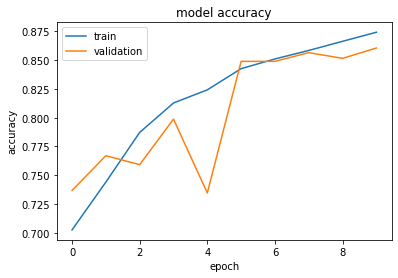

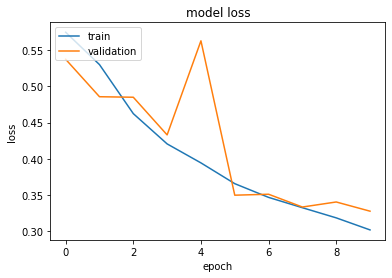

In [46]:
rmsprop_glorot_uni = build_model('rmsprop', 'glorot_uniform')
rmsprop_glorot_uni_history = rmsprop_glorot_uni.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
rmsprop_glorot_uni_loss, rmsprop_glorot_uni_accuracy = rmsprop_glorot_uni.evaluate(X_test, y_test, verbose=1)
plot_graph(rmsprop_glorot_uni_history)

#### 9.2 Glorot Normal Initialization

157/157 [==============================] - 7s 42ms/step - loss: 0.3319 - accuracy: 0.8568


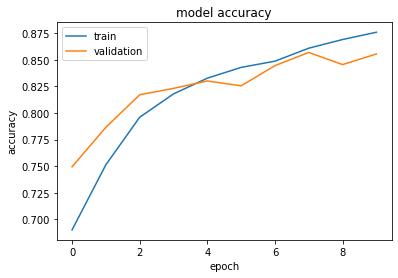

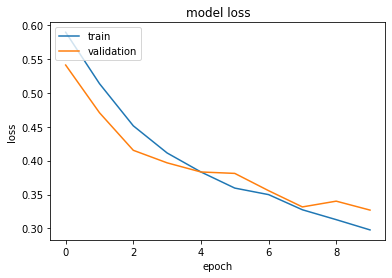

In [47]:
rmsprop_glorot_nor = build_model('rmsprop', 'glorot_normal')
rmsprop_glorot_nor_history = rmsprop_glorot_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
rmsprop_glorot_nor_loss, rmsprop_glorot_nor_accuracy = rmsprop_glorot_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(rmsprop_glorot_nor_history)

#### 9.3 He Uniform Initialization

157/157 [==============================] - 5s 33ms/step - loss: 0.3756 - accuracy: 0.8264


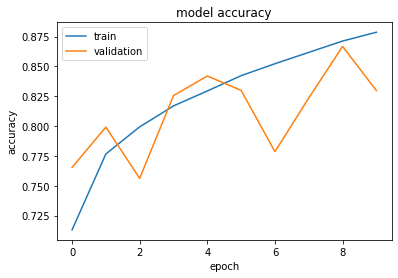

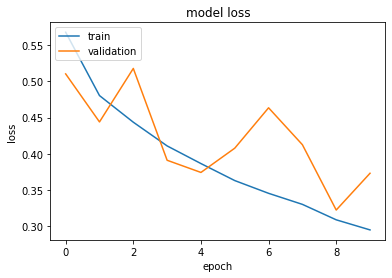

In [48]:
rmsprop_he_uni = build_model('rmsprop', 'he_uniform')
rmsprop_he_uni_history = rmsprop_he_uni.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
rmsprop_he_uni_loss, rmsprop_he_uni_accuracy = rmsprop_he_uni.evaluate(X_test, y_test, verbose=1)
plot_graph(rmsprop_he_uni_history)

#### 9.4 He Normal Initialization 

157/157 [==============================] - 5s 34ms/step - loss: 0.3478 - accuracy: 0.8524


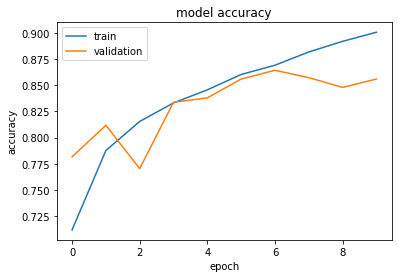

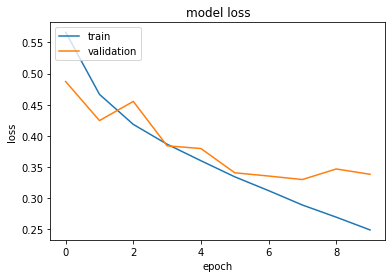

In [49]:
rmsprop_he_nor = build_model('rmsprop', 'he_normal')
rmsprop_he_nor_history = rmsprop_he_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
rmsprop_he_nor_loss, rmsprop_he_nor_accuracy = rmsprop_he_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(rmsprop_he_nor_history)

#### 9.5 LeCun Normal Initialization 

157/157 [==============================] - 5s 33ms/step - loss: 0.3424 - accuracy: 0.8526


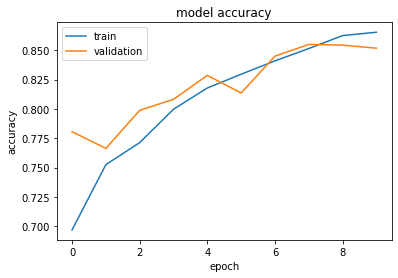

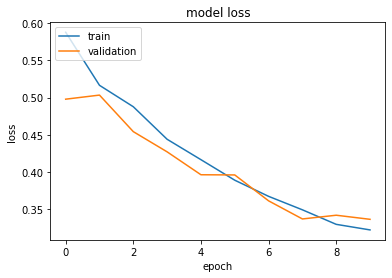

In [50]:
rmsprop_lecun_nor = build_model('rmsprop', 'lecun_normal')
rmsprop_lecun_nor_history = rmsprop_lecun_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
rmsprop_lecun_nor_loss, rmsprop_lecun_nor_accuracy = rmsprop_lecun_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(rmsprop_lecun_nor_history)

#### 9.6 Self-defined Initialization

<font size=3>This is a He Initialization with a uniform distribution based on $fan_{avg}$</font>

In [51]:
from keras.initializers import VarianceScaling
he_avg_init = VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')

157/157 [==============================] - 5s 34ms/step - loss: 0.3609 - accuracy: 0.8550


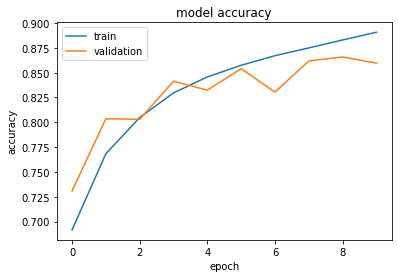

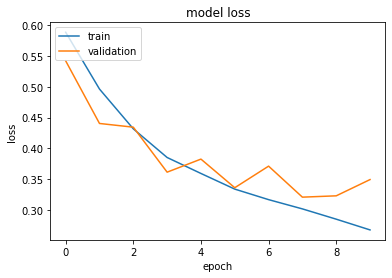

In [52]:
rmsprop_self_define = build_model('rmsprop', he_avg_init)
rmsprop_self_define_history = rmsprop_self_define.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
rmsprop_self_define_loss, rmsprop_self_define_accuracy = rmsprop_self_define.evaluate(X_test, y_test, verbose=1)
plot_graph(rmsprop_self_define_history)

### <b>10. Evaluation of RMSProp Optimizer & 6 Kernel Initializers</b>

#### 10.1 Training Accuracy & Validation Accuracy

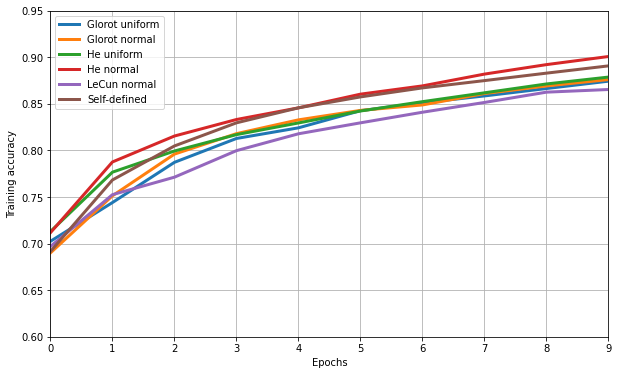

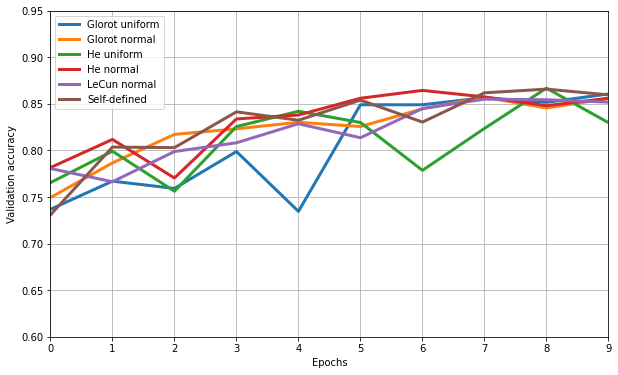

In [53]:
for accuracy in ("accuracy", "val_accuracy"):
    plt.figure(figsize=(10, 6))
    initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal', 'Self-defined']
    for history, initializer in zip((rmsprop_glorot_uni_history, rmsprop_glorot_nor_history, rmsprop_he_uni_history, 
                                  rmsprop_he_nor_history, rmsprop_lecun_nor_history, rmsprop_self_define_history),
                                 initializer):
        plt.plot(history.history[accuracy], label=f"{initializer}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"accuracy": "Training accuracy", "val_accuracy": "Validation accuracy"}[accuracy])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.6, 0.95])
    plt.show()

<font size=3>Compared to the corresponding graph in section 8.1, the validation accuracy vs epochs graph of the case of RMSProp optimizer shows significant instability and fluctuations across 10 epochs. <br><br>
This problem should be mostly due to the change of optimizer, which is responsible to adjust the weights and minimize the loss. RMSProp may not be a well-suited choice for our models.<br><br>
Last but not list, the overfitting problem also occur for the model with He normal initializer as the training accuracy (around 0.9) is far from the testing accuracy (around 0.85).</font>

#### 10.2 Training Loss & Validation Loss

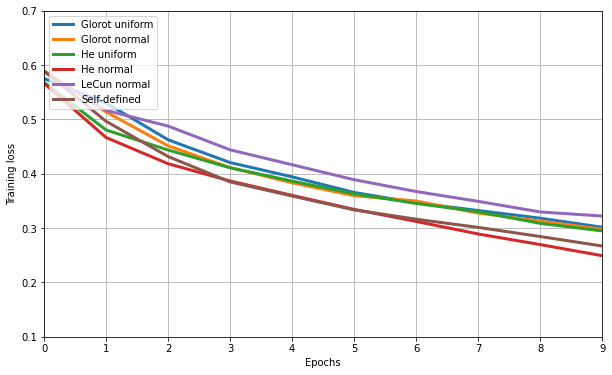

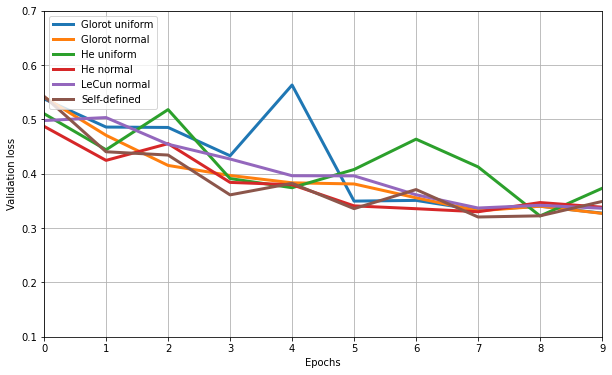

In [54]:
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(10, 6))
    initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal', 'Self-defined']
    for history, initializer in zip((rmsprop_glorot_uni_history, rmsprop_glorot_nor_history, rmsprop_he_uni_history, 
                                  rmsprop_he_nor_history, rmsprop_lecun_nor_history, rmsprop_self_define_history),
                                 initializer):
        plt.plot(history.history[loss], label=f"{initializer}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

<font size=3>Similar analysis in section 10.1 can be reused in this section. The instability and fluctuations in validation loss vs epochs graph indicate that changing the optimizer to RMSProp may be the reason behind.</font>

#### 10.3 Test Accuracy & Test Loss for RMSProp Optimizer & 6 Kernerl Initializers

In [55]:
initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal', 'Self-defined']
rmsprop_test_accuracy = [rmsprop_glorot_uni_accuracy, rmsprop_glorot_nor_accuracy, rmsprop_he_uni_accuracy, 
                      rmsprop_he_nor_accuracy, rmsprop_lecun_nor_accuracy, rmsprop_self_define_accuracy]
rmsprop_test_loss = [rmsprop_glorot_uni_loss, rmsprop_glorot_nor_loss, rmsprop_he_uni_loss, 
                  rmsprop_he_nor_loss, rmsprop_lecun_nor_loss, rmsprop_self_define_loss]
rmsprop_test_acc_loss = pd.DataFrame({'Kernel Initializer': initializer, 'Test Accuracy': rmsprop_test_accuracy, 'Test Loss': rmsprop_test_loss})

In [56]:
rmsprop_test_acc_loss

,Kernel Initializer,Test Accuracy,Test Loss
0,Glorot uniform,0.8582,0.328663
1,Glorot normal,0.8568,0.331944
2,He uniform,0.8264,0.375634
3,He normal,0.8524,0.347766
4,LeCun normal,0.8526,0.342421
5,Self-defined,0.8550,0.360930


<font size=3>Glorot kernel initializer is expected to be compatible with the sigmoid and hyperbolic tangent activation functions and the result in section 8.3 of the case of Adam optimizer also agrees with this expectation.<br>
<br>
In the case of using RMS optimizer, according to the above table of test accuracy and loss, Glorot uniform initializer demonstrates the highest test accuracy (0.8582) and the lowest test loss (0.328663) and Glorot normal initializer demonstrates the second highest test accuracy (0.8568) and the second lowest test loss (0.331944). <br>
<br>
RMSProp may not be the optimal optimzer for these models but the result in section 10.3 is also consistent with the convention of using Glorot kernel initializer with sigmoid and hyperbolic tangent activation functions.</font>

### <b>11. SGD Optimizer & 6 Kernel Initializers</b>

<font size=3>6 combinations of <b><font color=red>SGD</font></b> optimizer and <b><font color=red>Glorot uniform</font></b> , <b><font color=red>Glorot normal</font></b> , <b><font color=red>He uniform</font></b> , <b><font color=red>He normal</font></b> , <b><font color=red>LeCun normal</font></b>  and a <b><font color=red>self-defined (details will be discussed)</font></b> initialization are investigated as follows:</font>

#### 11.1 Glorot Uniform Initialization 

157/157 [==============================] - 6s 37ms/step - loss: 0.6106 - accuracy: 0.6790


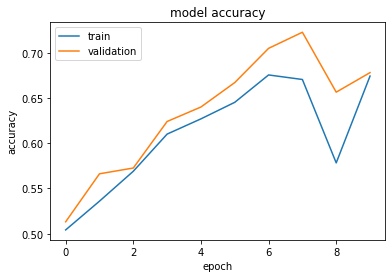

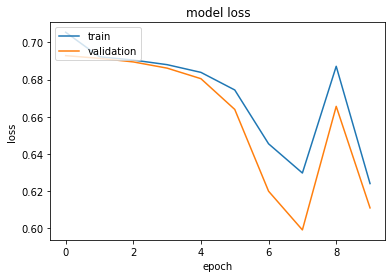

In [57]:
sgd_glorot_uni = build_model('sgd', 'glorot_uniform')
sgd_glorot_uni_history = sgd_glorot_uni.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
sgd_glorot_uni_loss, sgd_glorot_uni_accuracy = sgd_glorot_uni.evaluate(X_test, y_test, verbose=1)
plot_graph(sgd_glorot_uni_history)

#### 11.2 Glorot Normal Initialization

157/157 [==============================] - 7s 48ms/step - loss: 0.5695 - accuracy: 0.7064


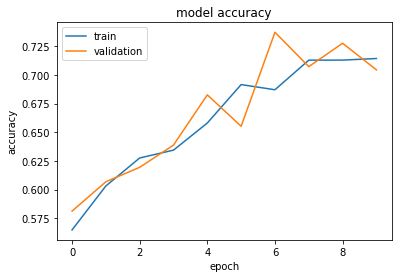

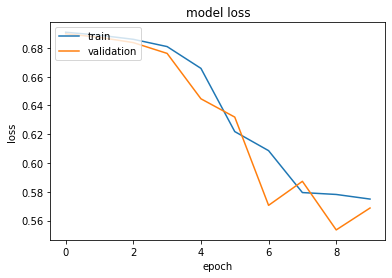

In [58]:
sgd_glorot_nor = build_model('sgd', 'glorot_normal')
sgd_glorot_nor_history = sgd_glorot_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
sgd_glorot_nor_loss, sgd_glorot_nor_accuracy = sgd_glorot_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(sgd_glorot_nor_history)

#### 11.3 He Uniform Initialization

157/157 [==============================] - 9s 54ms/step - loss: 0.6734 - accuracy: 0.6216


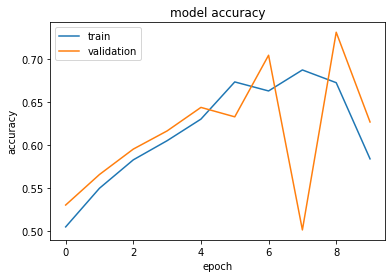

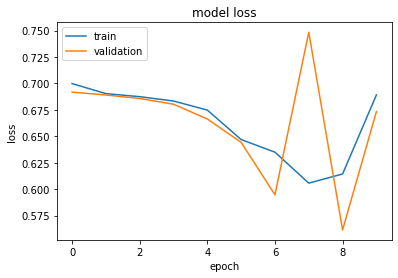

In [59]:
sgd_he_uni = build_model('sgd', 'he_uniform')
sgd_he_uni_history = sgd_he_uni.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
sgd_he_uni_loss, sgd_he_uni_accuracy = sgd_he_uni.evaluate(X_test, y_test, verbose=1)
plot_graph(sgd_he_uni_history)

#### 11.4 He Normal Initialization 

157/157 [==============================] - 6s 37ms/step - loss: 0.5942 - accuracy: 0.7048


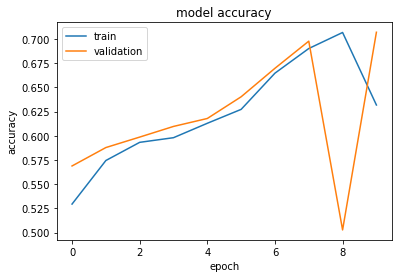

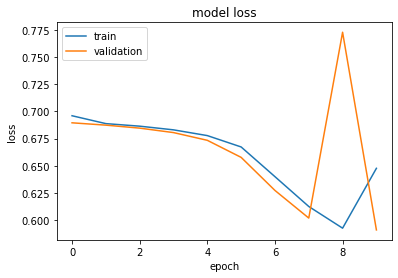

In [60]:
sgd_he_nor = build_model('sgd', 'he_normal')
sgd_he_nor_history = sgd_he_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
sgd_he_nor_loss, sgd_he_nor_accuracy = sgd_he_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(sgd_he_nor_history)

#### 11.5 LeCun Normal Initialization 

157/157 [==============================] - 7s 42ms/step - loss: 0.6704 - accuracy: 0.6502


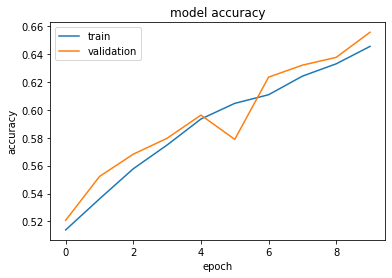

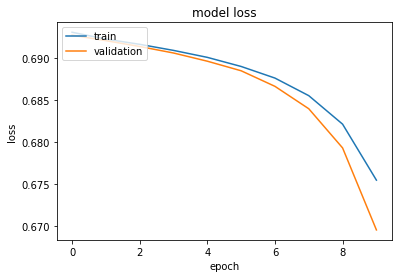

In [61]:
sgd_lecun_nor = build_model('sgd', 'lecun_normal')
sgd_lecun_nor_history = sgd_lecun_nor.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
sgd_lecun_nor_loss, sgd_lecun_nor_accuracy = sgd_lecun_nor.evaluate(X_test, y_test, verbose=1)
plot_graph(sgd_lecun_nor_history)

#### 11.6 Self-defined Initialization

<font size=3>This is a He Initialization with a uniform distribution based on $fan_{avg}$</font>

In [62]:
from keras.initializers import VarianceScaling
he_avg_init = VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')

157/157 [==============================] - 6s 36ms/step - loss: 0.6531 - accuracy: 0.6468


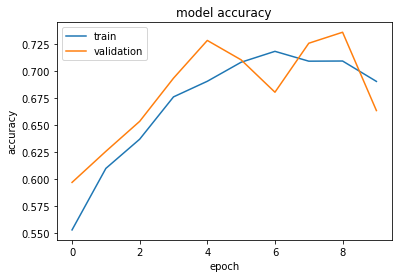

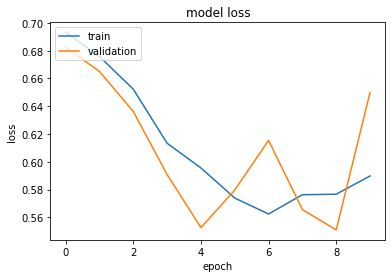

In [63]:
sgd_self_define = build_model('sgd', he_avg_init)
sgd_self_define_history = sgd_self_define.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0, validation_data=(X_valid, y_valid))
sgd_self_define_loss, sgd_self_define_accuracy = sgd_self_define.evaluate(X_test, y_test, verbose=1)
plot_graph(sgd_self_define_history)

### <b>12. Evaluation of SGD Optimizer & 6 Kernel Initializers</b>

#### 12.1 Training Accuracy & Validation Accuracy

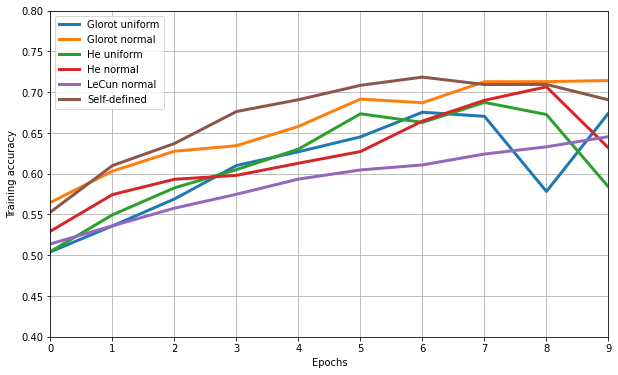

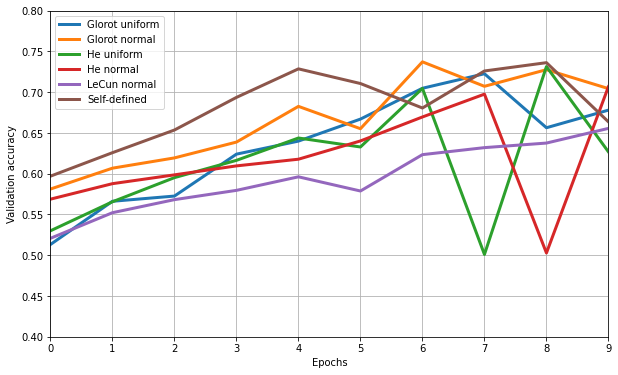

In [70]:
for accuracy in ("accuracy", "val_accuracy"):
    plt.figure(figsize=(10, 6))
    initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal', 'Self-defined']
    for history, initializer in zip((sgd_glorot_uni_history, sgd_glorot_nor_history, sgd_he_uni_history, 
                                  sgd_he_nor_history, sgd_lecun_nor_history, sgd_self_define_history),
                                 initializer):
        plt.plot(history.history[accuracy], label=f"{initializer}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"accuracy": "Training accuracy", "val_accuracy": "Validation accuracy"}[accuracy])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.4, 0.8])
    plt.show()

<font size=3>Compared to the two corresponding graphs in section 8.1 and 10.1, the instability and fluctuations for training and validation accuracy are much more serious. <br><br>The overall training and validation accuracy of all models are significantly lower that all are below 0.8 after using SGD optimizier. 
Moreover, the training and validation accuracy of six models diverage largerly to six different values after running 10 epochs. <br><br>
These problem should be greatly due to the use of SGD optimizer. One remarkable point is that the training and validation accuracy of model with Glorot normal initializer are the highest and close.
</font>

#### 12.2 Training Loss & Validation Loss

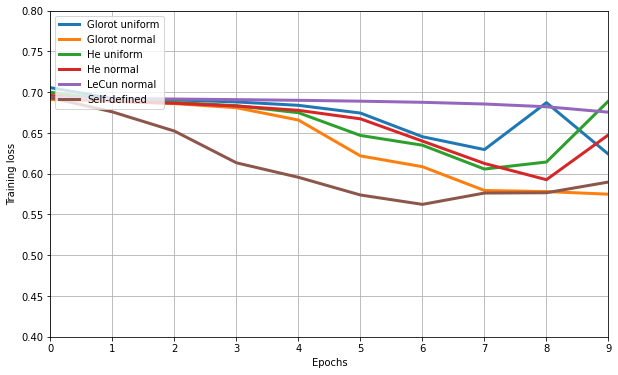

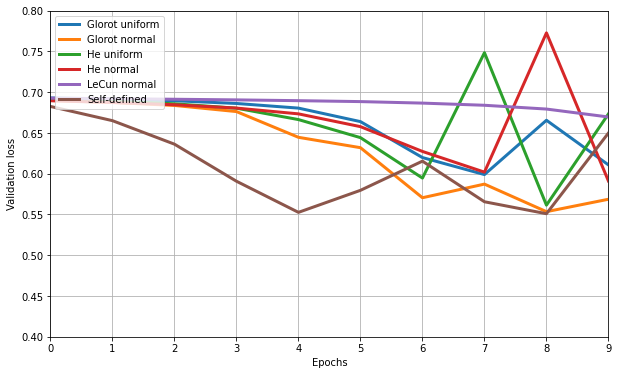

In [69]:
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(10, 6))
    initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal', 'Self-defined']
    for history, initializer in zip((sgd_glorot_uni_history, sgd_glorot_nor_history, sgd_he_uni_history, 
                                  sgd_he_nor_history, sgd_lecun_nor_history, sgd_self_define_history),
                                 initializer):
        plt.plot(history.history[loss], label=f"{initializer}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.4, 0.8])
    plt.show()

<font size=3>Compared to the two corresponding graphs in section 8.2 and 10.2, the instability and fluctuations for training and validation accuracy are much more serious. <br><br> In the above two graphs, the loss often rebound to higher values (>0.7) and the overall decrease is not significant within the 10 epochs. Moreover, the training and validation loss of six models diverage largerly to different six values after running 10 epochs.<br><br>
These problem should be greatly due to the use of SGD optimizer. One noticeable point is that the training and validation loss of model with Glorot normal initializer are the lowest and decrease steadily.
</font>

#### 12.3 Test Accuracy & Test Loss for SGD Optimizer & 6 Kernerl Initializers

In [66]:
initializer = ['Glorot uniform','Glorot normal', 'He uniform', 'He normal', 'LeCun normal', 'Self-defined']
sgd_test_accuracy = [sgd_glorot_uni_accuracy, sgd_glorot_nor_accuracy, sgd_he_uni_accuracy, 
                      sgd_he_nor_accuracy, sgd_lecun_nor_accuracy, sgd_self_define_accuracy]
sgd_test_loss = [sgd_glorot_uni_loss, sgd_glorot_nor_loss, sgd_he_uni_loss, 
                  sgd_he_nor_loss, sgd_lecun_nor_loss, sgd_self_define_loss]
sgd_test_acc_loss = pd.DataFrame({'Kernel Initializer': initializer, 'Test Accuracy': sgd_test_accuracy, 'Test Loss': sgd_test_loss})

In [67]:
sgd_test_acc_loss

,Kernel Initializer,Test Accuracy,Test Loss
0,Glorot uniform,0.6790,0.610634
1,Glorot normal,0.7064,0.569534
2,He uniform,0.6216,0.673442
3,He normal,0.7048,0.594210
4,LeCun normal,0.6502,0.670383
5,Self-defined,0.6468,0.653076


<font size=3>Compared to the corresponding two tables in section 8.3 and 10.3, all the test accuracy and loss are much lower and higher respectively. The changing optimizer to SGD should be the main reason. <br><br> 
Among the above 6 models, the test accuracy and loss of model with Glorot normal initializer are the highest (0.7064) and lowest (0.569534) respectively. This is also consistent with the convention of using Glorot kernel initializer with sigmoid and hyperbolic tangent activation functions.
</font>

### <b>13. Conclusion</b>

<font size=3>Among the 18 combinations, the model with <b><font color=red>Adam optimizer</font></b> and <b><font color=red>Glorot normal initializer</font></b> performs the best that the test accuracy and loss are the highest (<b><font color=red>0.8662</font></b>) and lowest (<b><font color=red>0.316056</font></b>) respectively. <br><br>
Among 3 optimzers, the <b><font color=red>Adam optimizer is the best choice</font></b>. The accuracy and loss of 18 models in both training and validation sets increase and decrease stably respectively in 10 epochs. <br><br>
The <b><font color=red>SGD optimizer is the worst choice</font></b>. The accuracy and loss of 18 models in both training and validation sets fluctuate dramatically in 10 epochs.<br><br>
The <b><font color=red>RMSProp optimizer is a moderate choice</font></b>. The accuracy and loss of 18 models in validation sets fluctuate moderately in 10 epochs, while the accuracy and loss of 18 models in training sets increase and decrease steadily respectively in 10 epochs.<br><br>
Moreover, according to the tables in section 8.3, 10.3, 12.3, the <b><font color=red>test accuracy and loss</font></b> of the 6 models using <b><font color=red>Adam optimizer</font></b> are higher and lower than the test accuracy and loss of the corresponding models using RMSProp and SGD optimizers.<br><br>
<b><font color=red>Glorot kernel initializer (Glorot uniform & Glorot normal)</font></b> outperforms other initializers in this project. The possible reason is the use of sigmoid and hyperbolic tangent activation functions in the baseline model.
</font>